In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
# Need to install this into the env i.e. tensorflow env or pytorch env
# !pip install ipython-autotime
%load_ext autotime

time: 391 µs (started: 2023-04-17 21:26:45 +05:30)


In [4]:
# Use this one liner
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# manually turning off cuda, just to test
# device = torch.device('cuda' if False else 'cpu')

time: 23.5 ms (started: 2023-04-17 21:27:10 +05:30)


In [5]:
print(torch.__version__)
# you can use this to set CUDA as default, but if CUDA is not available then you will get error
# torch.set_default_tensor_type('torch.cuda.FloatTensor')

2.0.0+cu118
time: 568 µs (started: 2023-04-17 21:27:12 +05:30)


In [6]:
N = 50
x = torch.randn(N, 1).to(device)
y = 3*x + torch.randn(N, 1).to(device)

time: 1.11 s (started: 2023-04-17 21:27:14 +05:30)


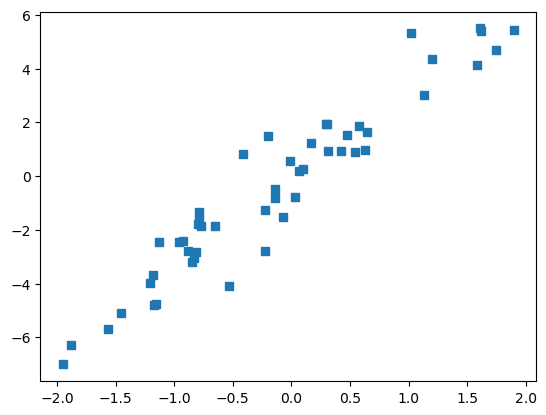

time: 157 ms (started: 2023-04-17 21:27:36 +05:30)


In [7]:
plt.plot(x.cpu(), y.cpu(), 's')
plt.show()

In [8]:
ANNreg = nn.Sequential(
    nn.Linear(1, 1),  # input layer
    nn.Linear(1, 1)  # output layer
)

time: 2.93 ms (started: 2023-04-17 21:27:44 +05:30)


In [9]:
ANNreg = ANNreg.to(device)

time: 1.21 ms (started: 2023-04-17 21:27:45 +05:30)


In [10]:
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Linear(in_features=1, out_features=1, bias=True)
)

time: 3.27 ms (started: 2023-04-17 21:27:46 +05:30)


In [11]:
# Learning rate
lr = 0.01
lossfunc = nn.MSELoss()

time: 640 µs (started: 2023-04-17 21:27:47 +05:30)


In [12]:
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=lr)

time: 519 µs (started: 2023-04-17 21:27:54 +05:30)


In [13]:
epochs = 500
losses = torch.zeros(epochs).to(device)

time: 1.45 ms (started: 2023-04-17 21:27:55 +05:30)


In [14]:
for epoch in range(epochs):
  # forward pass
  yPred = ANNreg(x).to(device)

  # compute loss
  loss = lossfunc(yPred, y)
  losses[epoch] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

time: 1.31 s (started: 2023-04-17 21:27:59 +05:30)


In [15]:
predictions = ANNreg(x)

time: 1.14 ms (started: 2023-04-17 21:28:01 +05:30)


In [16]:
testloss = (predictions - y).pow(2).mean()

time: 973 µs (started: 2023-04-17 21:28:02 +05:30)


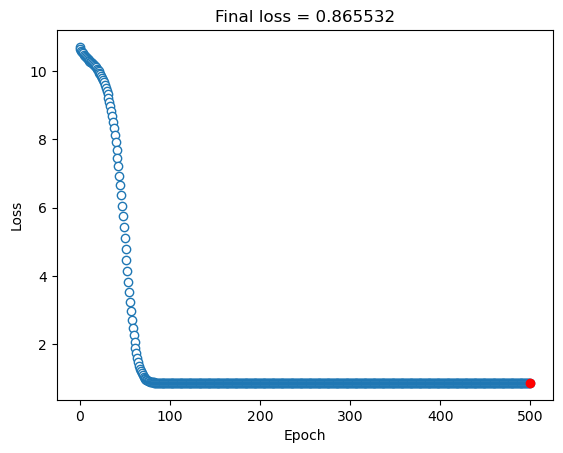

time: 163 ms (started: 2023-04-17 21:28:03 +05:30)


In [17]:
# detach() function removes the grandient function
# associated with the tensor returned and a normal tensor is returned
plt.plot(losses.detach().cpu(), 'o', markerfacecolor='w', linewidth=0.1)
plt.plot(epochs, testloss.detach().cpu(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# item() returns only the value, not a tensor
plt.title('Final loss = %g' %testloss.item())
plt.show()

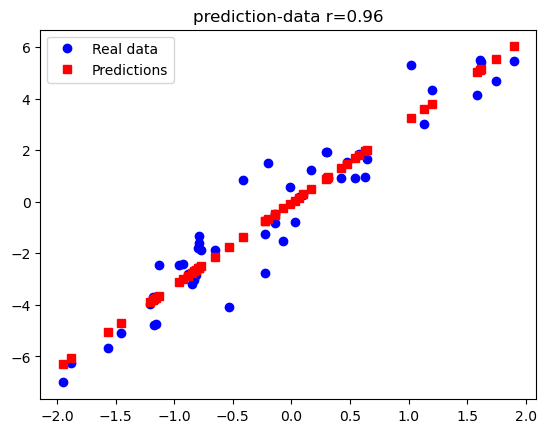

time: 188 ms (started: 2023-04-17 21:28:07 +05:30)


In [18]:
# plot the data
plt.plot(x.cpu(), y.cpu(), 'bo', label='Real data')
plt.plot(x.cpu(), predictions.detach().cpu(), 'rs', label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T.cpu(), predictions.detach().T.cpu())[0, 1]:.2f}')
plt.legend()
plt.show()